In [1]:
!pip install pandas matplotlib ipywidgets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.9 MB/s eta 0:00:00


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dropdown(description='Document:', options=('Industry 4.0 Project', 'Part Studio 1 Copy 1.stl', 'Part Studio 1.…

Button(description='Update Plot', style=ButtonStyle(), tooltip='Click to update plot')

Button(description='Save Report', style=ButtonStyle(), tooltip='Click to save report')

Reports have been generated and saved successfully.


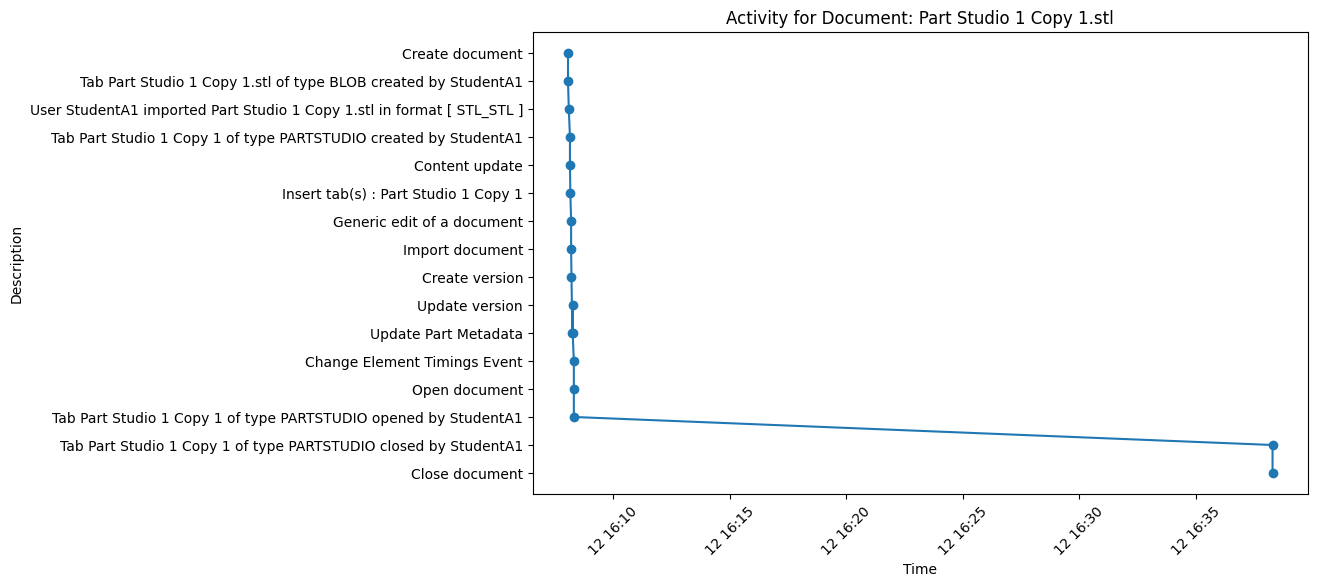

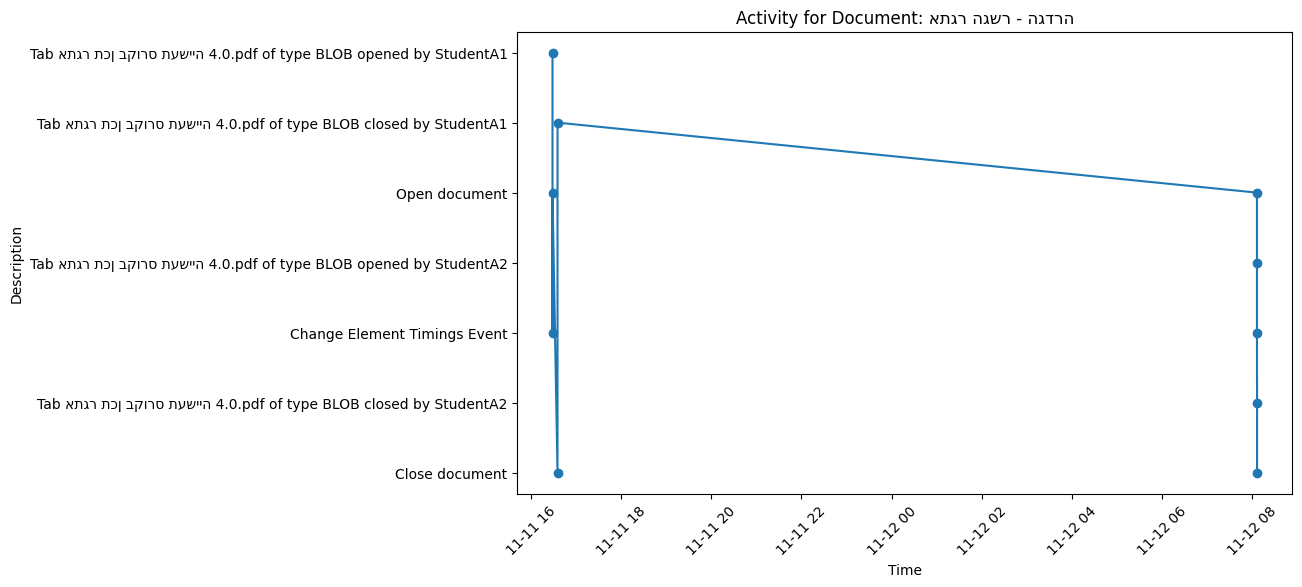

In [3]:

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import json
import ipywidgets as widgets
from IPython.display import display
from google.colab import drive, files

# Mount Google Drive
drive.mount('/content/drive')

# Load JSON file from Google Drive
json_file_path = '/content/drive/My Drive/team1.json'

with open(json_file_path, 'r') as file:
    data = json.load(file)

# Convert JSON data to Pandas DataFrame
df = pd.json_normalize(data)
df['Time'] = pd.to_datetime(df['Time'])  # Convert Time column to datetime
df.head()

# Create a dropdown widget for filtering by document
document_dropdown = widgets.Dropdown(
    options=df['Document'].unique(),
    description='Document:',
    disabled=False,
)

# Create a button to update the plot
update_button = widgets.Button(
    description='Update Plot',
    disabled=False,
    button_style='',
    tooltip='Click to update plot',
)

# Display the widgets
display(document_dropdown, update_button)

# Function to update the plot based on selected document
def update_plot(b):
    filtered_df = df[df['Document'] == document_dropdown.value]
    plt.figure(figsize=(10, 6))
    plt.plot(filtered_df['Time'], filtered_df['Description'], marker='o')
    plt.xlabel('Time')
    plt.ylabel('Description')
    plt.title(f'Activity for Document: {document_dropdown.value}')
    plt.xticks(rotation=45)
    plt.show()

# Attach the update_plot function to the button
update_button.on_click(update_plot)

# Function to save and download the report
def save_report():
    filtered_df = df[df['Document'] == document_dropdown.value]
    # Save filtered data to CSV
    filtered_df.to_csv(f'{document_dropdown.value}_report.csv', index=False)
    files.download(f'{document_dropdown.value}_report.csv')

save_button = widgets.Button(
    description='Save Report',
    disabled=False,
    button_style='',
    tooltip='Click to save report',
)

save_button.on_click(lambda b: save_report())

display(save_button)

# Display message for teacher
print("Reports have been generated and saved successfully.")
